# Part 1


In [2]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
import numpy as np


In [9]:
data, labels = make_circles(n_samples=500, shuffle=True, noise=0.08, random_state=None, factor=0.8)


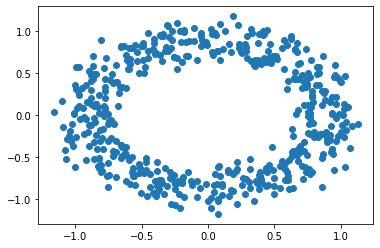

In [7]:
plt.scatter(data[:,0], data[:,1])

In [8]:
X = data[:,0]
Y = data[:,1]
data.shape

(500, 2)

## NN without Activation

In [5]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.7.0


In [6]:
LOSS = []
ACC = []

In [7]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(2,)),
  tf.keras.layers.Dense(4, activation = None),
  tf.keras.layers.Dense(4, activation = None),
  tf.keras.layers.Dense(1, activation = None)
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 2)                 0         
                                                                 
 dense (Dense)               (None, 4)                 12        
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.fit(
        x=data,
        y=labels,
        epochs=10,
        verbose = 0
    )

In [9]:
loss, accuracy = model.evaluate(data, labels)
LOSS.append(loss)
ACC.append(accuracy)
print(f"Loss: {loss} \nAccuracy: {accuracy}")

16/16 [==============================] - 0s 731us/step - loss: 4.2777 - accuracy: 0.4680
Loss: 4.277749538421631 
Accuracy: 0.46799999475479126


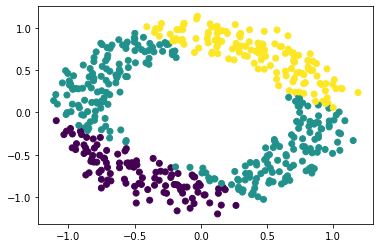

In [10]:
predict = np.rint(model.predict(data))
plt.scatter(X, Y, c = predict)

##### As you we can observe the accuracy is 0.5 and has not changes from the random state which means that the training has not been successful. 
##### Accuracy being low indicates that we cannot categorize this data without activation functions. 
##### The reason is that this data cannot be categorized in a linear way and that is what a nn without an activation function does (It tries to categorize the data in a linear way). Meaning that the activation function adds non-linearity.

## NN with Linear Activation

In [11]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(2,)),
  tf.keras.layers.Dense(4, activation = tf.keras.activations.linear),
  tf.keras.layers.Dense(4, activation = tf.keras.activations.linear),
  tf.keras.layers.Dense(1, activation = tf.keras.activations.linear)
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 2)                 0         
                                                                 
 dense_3 (Dense)             (None, 4)                 12        
                                                                 
 dense_4 (Dense)             (None, 4)                 20        
                                                                 
 dense_5 (Dense)             (None, 1)                 5         
                                                                 
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.fit(
        x=data,
        y=labels,
        epochs=10,
        verbose = 0
    )

In [13]:
loss, accuracy = model.evaluate(data, labels)
LOSS.append(loss)
ACC.append(accuracy)
print(f"Loss: {loss} \nAccuracy: {accuracy}")

16/16 [==============================] - 0s 731us/step - loss: 6.7554 - accuracy: 0.5040
Loss: 6.755407333374023 
Accuracy: 0.5040000081062317


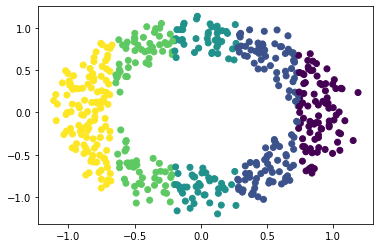

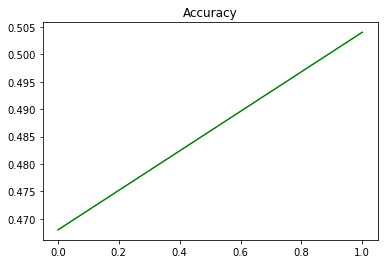

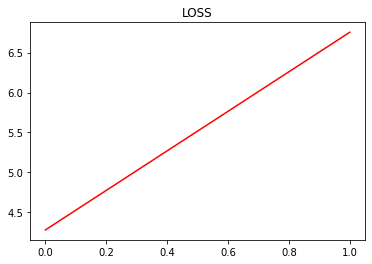

In [14]:
predict = np.rint(model.predict(data))
plt.scatter(X, Y, c = predict)
plt.show()

plt.plot(ACC, color='g')
plt.title("Accuracy")
plt.show()

plt.plot(LOSS, color='r')
plt.title("LOSS")
plt.show()

##### Same as before; the accuracy is not far from being random wich means that the linear activation has not helped with the non-linear classification. Our data cannot be classified using a linear method.

## Regression Loss

In [15]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(2,)),
  tf.keras.layers.Dense(4, activation = tf.keras.activations.linear),
  tf.keras.layers.Dense(4, activation = tf.keras.activations.linear),
  tf.keras.layers.Dense(1, activation = tf.keras.activations.linear)
])

model.compile(loss="MeanSquaredError", optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 2)                 0         
                                                                 
 dense_6 (Dense)             (None, 4)                 12        
                                                                 
 dense_7 (Dense)             (None, 4)                 20        
                                                                 
 dense_8 (Dense)             (None, 1)                 5         
                                                                 
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.fit(
        x=data,
        y=labels,
        epochs=10,
        verbose = 0
    )

In [17]:
loss, accuracy = model.evaluate(data, labels)
LOSS.append(loss)
ACC.append(accuracy)
print(f"Loss: {loss} \nAccuracy: {accuracy}")

16/16 [==============================] - 0s 866us/step - loss: 0.2535 - accuracy: 0.5000
Loss: 0.25345084071159363 
Accuracy: 0.5


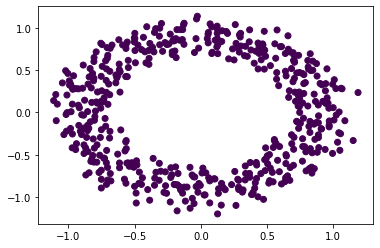

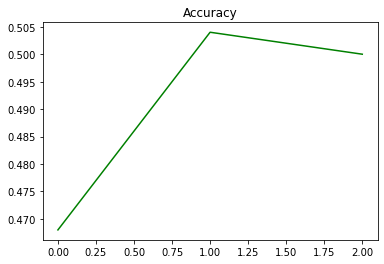

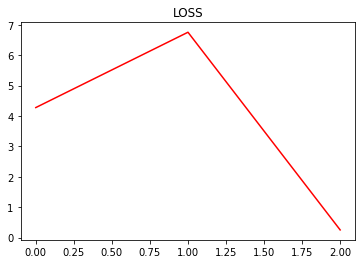

In [18]:
predict = np.rint(model.predict(data))
plt.scatter(X, Y, c = predict)
plt.show()

plt.plot(ACC, color='g')
plt.title("Accuracy")
plt.show()

plt.plot(LOSS, color='r')
plt.title("LOSS")
plt.show()

##### In as we can see the results are not promising still. Our data is not a numeric prediction problem so using a regression loss function will not help with our categorization.

## Single Layer NN

In [19]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(2,)),
  tf.keras.layers.Dense(20, activation = 'relu'),
  tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 2)                 0         
                                                                 
 dense_9 (Dense)             (None, 20)                60        
                                                                 
 dense_10 (Dense)            (None, 1)                 21        
                                                                 
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.fit(
        x=data,
        y=labels,
        epochs=10,
        verbose = 0
    )

In [21]:
loss, accuracy = model.evaluate(data, labels)
LOSS.append(loss)
ACC.append(accuracy)
print(f"Loss: {loss} \nAccuracy: {accuracy}")

16/16 [==============================] - 0s 865us/step - loss: 0.6898 - accuracy: 0.5080
Loss: 0.6898277401924133 
Accuracy: 0.5080000162124634


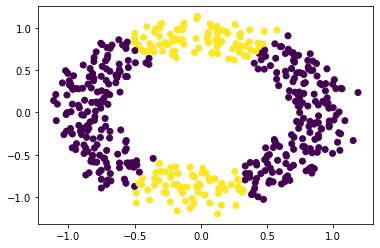

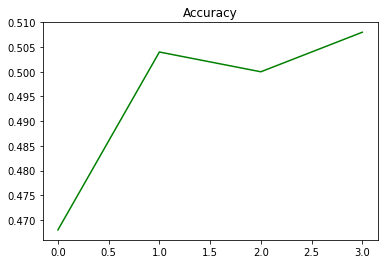

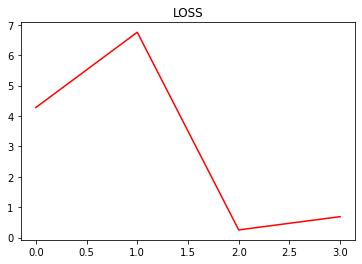

In [22]:
predict = np.rint(model.predict(data))
plt.scatter(X, Y, c = predict)
plt.show()

plt.plot(ACC, color='g')
plt.title("Accuracy")
plt.show()

plt.plot(LOSS, color='r')
plt.title("LOSS")
plt.show()

##### The plots show that we still cannot classify our data using a single layer network. The reason is that our data has more complexity and non-linearity that what a single layer nn can classify.

## Learning Rate

16/16 [==============================] - 0s 811us/step - loss: 0.5302 - accuracy: 0.7560


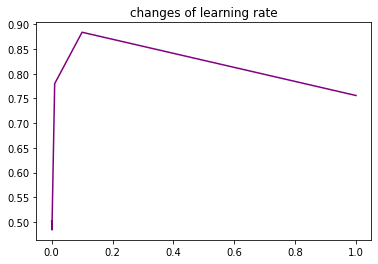

In [23]:
rates = [0.0001, 0.001, 0.01, 0.1, 1]
l_loss = []
l_acc = []
for r in rates:
    model = tf.keras.models.Sequential([
      tf.keras.layers.Flatten(input_shape=(2,)),
      tf.keras.layers.Dense(20, activation = 'relu'),
      tf.keras.layers.Dense(1, activation = 'sigmoid')
    ])

    model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=r,), metrics=['accuracy'])
    model.fit(
        x=data,
        y=labels,
        epochs=10,
        verbose = 0
    )
    loss, accuracy = model.evaluate(data, labels)
    l_loss.append(loss)
    l_acc.append(accuracy)

plt.plot(rates , l_acc, color='purple')
plt.title("changes of learning rate")
plt.show()

##### Based on the experiment with the learning rate (as you can see in the purple plot) the best learning rate is between 0.01 and 0.1 which acheives an accuracy of 85 percent. <br>

In [24]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(2,)),
  tf.keras.layers.Dense(20, activation = 'relu'),
  tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.01,), metrics=['accuracy'])

In [25]:
model.fit(
        x=data,
        y=labels,
        epochs=10,
        verbose = 0
    )

In [26]:
loss, accuracy = model.evaluate(data, labels)
LOSS.append(loss)
ACC.append(accuracy)
print(f"Loss: {loss} \nAccuracy: {accuracy}")

16/16 [==============================] - 0s 798us/step - loss: 0.5805 - accuracy: 0.8620
Loss: 0.5804789066314697 
Accuracy: 0.8619999885559082


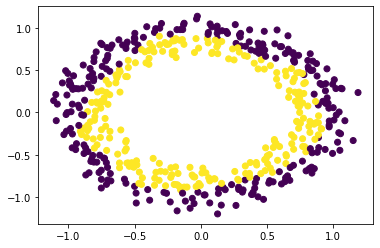

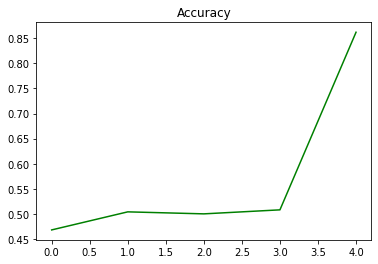

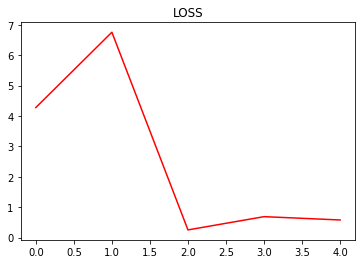

In [27]:
predict = np.rint(model.predict(data))
plt.scatter(X, Y, c = predict)
plt.show()

plt.plot(ACC, color='g')
plt.title("Accuracy")
plt.show()

plt.plot(LOSS, color='r')
plt.title("LOSS")
plt.show()

##### Learning rate indicates the steps in which the network moves into steeper parts of gradient decent. If the learning rate is too large it will not find the optimal value as it will be moving too much anf id it is too small it will take a long time.


##### As you can see in the plots of the classification of data, there is a border between the circle in the center and the the other one.

## Complete NN

In [28]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(2,)),
  tf.keras.layers.Dense(30, activation = 'relu'),
  tf.keras.layers.Dense(30, activation = 'relu'),
  tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.01,), metrics=['accuracy'])
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 2)                 0         
                                                                 
 dense_23 (Dense)            (None, 30)                90        
                                                                 
 dense_24 (Dense)            (None, 30)                930       
                                                                 
 dense_25 (Dense)            (None, 1)                 31        
                                                                 
Total params: 1,051
Trainable params: 1,051
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.fit(
        x=data,
        y=labels,
        epochs=10,
        verbose = 0
    )

In [30]:
loss, accuracy = model.evaluate(data, labels)
LOSS.append(loss)
ACC.append(accuracy)
print(f"Loss: {loss} \nAccuracy: {accuracy}")

16/16 [==============================] - 0s 798us/step - loss: 0.3446 - accuracy: 0.8560
Loss: 0.34458237886428833 
Accuracy: 0.8560000061988831


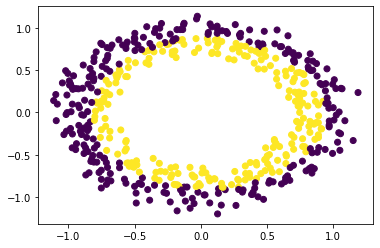

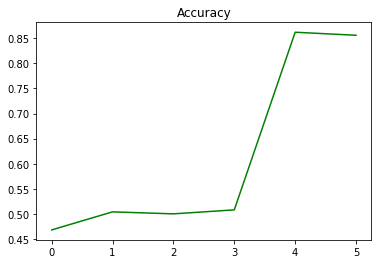

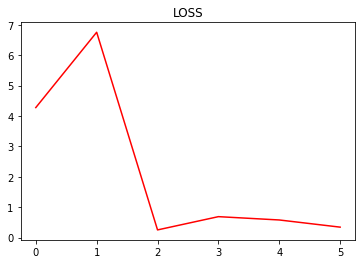

In [31]:
predict = np.rint(model.predict(data))
plt.scatter(X, Y, c = predict)
plt.show()

plt.plot(ACC, color='g')
plt.title("Accuracy")
plt.show()

plt.plot(LOSS, color='r')
plt.title("LOSS")
plt.show()

The best accuracy obtained is 88 percent using a 0.01 learning rate and 10 epochs with relu activation in hidden layers and a sigmoid as the final layer activations.
The reason of its excellent performance is that ot is using non-linear activations that can classify non-linear classes of data (such as ours)perfectly. Also the learning rate is set to 0.01 which works best with our data

## Part2

In [32]:
from tensorflow.keras.datasets import fashion_mnist

In [33]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [34]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [35]:
train_images.shape

(60000, 28, 28)

In [36]:
train_images = train_images / 255.0

test_images = test_images / 255.0

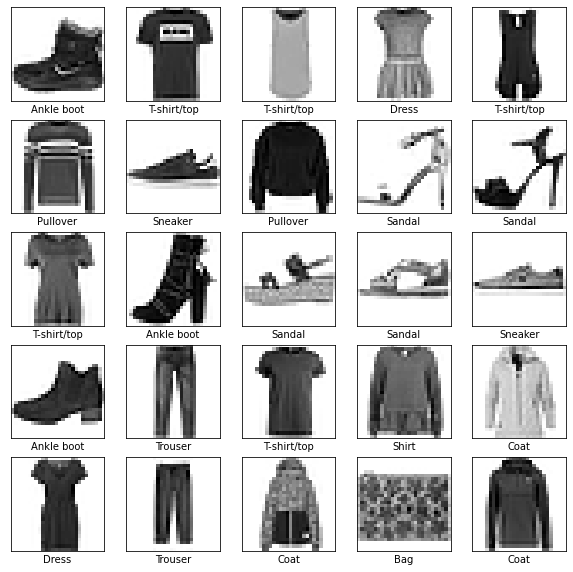

In [37]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [38]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [39]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [40]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4990 - accuracy: 0.8252: 1s - loss: 0.6005 - accura - E
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3741 - accuracy: 0.8658
Epoch 3/10
1875/1875 [==============================] - 2s 944us/step - loss: 0.3377 - accuracy: 0.8769
Epoch 4/10
1875/1875 [==============================] - 2s 991us/step - loss: 0.3125 - accuracy: 0.8864
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2946 - accuracy: 0.8910
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2801 - accuracy: 0.8967
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2685 - accuracy: 0.9010
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2553 - accuracy: 0.9051
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2450 - accuracy: 0.9095
Epoch 10/10
1875/1875 [=======================

In [41]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3643 - accuracy: 0.8765 - 338ms/epoch - 1ms/step

Test accuracy: 0.8765000104904175


In [42]:
from sklearn.metrics import ConfusionMatrixDisplay


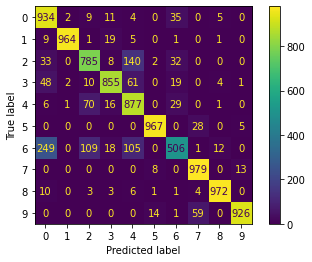

In [43]:
predictions = np.argmax(model.predict(test_images), axis=1)

disp = ConfusionMatrixDisplay.from_predictions(
    test_labels,
    predictions
)

